Project Description: Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change

The dataset is extracted from kaggle.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.



Dataset Description:
Number of columns: 23
Number of rows : 145560

Date  - The date of observation
Location  -The common name of the location of the weather station
MinTemp  -The minimum temperature in degrees celsius
MaxTemp -The maximum temperature in degrees celsius
Rainfall  -The amount of rainfall recorded for the day in mm
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine  -The number of hours of bright sunshine in the day.
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am -Direction of the wind at 9am
WindDir3pm -Direction of the wind at 3pm
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am -Humidity (percent) at 9am
Humidity3pm -Humidity (percent) at 3pm
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am - Fraction of sky obscured by cloud at 9am. 
Cloud3pm -Fraction of sky obscured by cloud 
Temp9am-Temperature (degrees C) at 9am
Temp3pm -Temperature (degrees C) at 3pm
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



Steps to Follow for the Project: The dataset contains 14 features and 32561 samples
Below are the steps to follow for the project:

Import the required libraries and data.
Do the careful EDA analysis, preprocessing and feature engineering on the given data.
Build/Test multiple models on the same dataset.
Check underfitting/overfitting,  avoid underfitting or overfitting (bias/variance) , cross validation and all performance parameters(metrics) for all models depending on the problem type.
Try to achieve a model with good performance.
Select the best/final performing model and explain on what basis you have selected the particular model as a final model.
Do hyper parameter tuning on the final/best model or on all models.
Save the best model for production and convey on which basis you have chosen that model.
Make the documentation and write your findings in the same file i.e. ipynb

# Importing required Libraries

In [66]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import datasets,linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import warnings 
warnings.filterwarnings('ignore')
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
import joblib
from sklearn.model_selection import cross_validate,KFold,cross_val_score
from sklearn.metrics import  roc_curve, roc_auc_score
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier)
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor


In [67]:
# Loading the dataset downloaded from kaggle
rain_dt=pd.read_csv('weatherAUS.csv')
rain_dt.head(10)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
5  2008-12-06   Albury     14.6     29.7       0.2          NaN       NaN   
6  2008-12-07   Albury     14.3     25.0       0.0          NaN       NaN   
7  2008-12-08   Albury      7.7     26.7       0.0          NaN       NaN   
8  2008-12-09   Albury      9.7     31.9       0.0          NaN       NaN   
9  2008-12-10   Albury     13.1     30.1       1.4          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   
5         WNW           56.0          W  ...        55.0         23.0   
6           W           50.0         SW  ...        49.0         19.0   
7           W           35.0        SSE  ...        48.0         19.0   
8         NNW           80.0         SE  ...        42.0          9.0   
9           W           28.0          S  ...        58.0         27.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   
5       1009.2       1005.4       NaN       NaN     20.6     28.9         No   
6       1009.6       1008.2       1.0       NaN     18.1     24.6         No   
7       1013.4       1010.1       NaN       NaN     16.3     25.5         No   
8       1008.9       1003.6       NaN       NaN     18.3     30.2         No   
9       1007.0       1005.7       NaN       NaN     20.1     28.2        Yes   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  
5            No  
6            No  
7            No  
8           Yes  
9            No  

[10 rows x 23 columns]

In [68]:
rain_dt.shape # to determine the shape of the dataset

(145460, 23)

In [69]:
rain_dt.info() # to determine the data types of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [70]:
# groupby column data types
rain_dt.columns.groupby(rain_dt.dtypes)

{float64: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], object: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']}

In [71]:
# number of columns of a particular data type
print("No of columns for {} is {}.".format(list(rain_dt.columns.groupby(rain_dt.dtypes).keys())[0], len(rain_dt.columns.groupby(rain_dt.dtypes)[list(rain_dt.columns.groupby(rain_dt.dtypes).keys())[0]])))
print("No of columns for {} is {}.".format(list(rain_dt.columns.groupby(rain_dt.dtypes).keys())[1], len(rain_dt.columns.groupby(rain_dt.dtypes)[list(rain_dt.columns.groupby(rain_dt.dtypes).keys())[1]])))

No of columns for float64 is 16.
No of columns for object is 7.


In [72]:
# Separating numerical and categorical variable
Num_var=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
obj_var=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'] 

# Data Cleaning and Transfroming (Exploratory Data Analysis)

In [73]:
# Checking for null values
rain_dt.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [74]:
# dropping the null values
rain_dt.dropna(inplace=True)

In [75]:
rain_dt.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [76]:
# Checking for duplicated values since the dataset is large
rain_dt.duplicated().sum()


0

In [77]:
rain_dt.shape # 3465 duplicates value was removed

(56420, 23)

<AxesSubplot:>

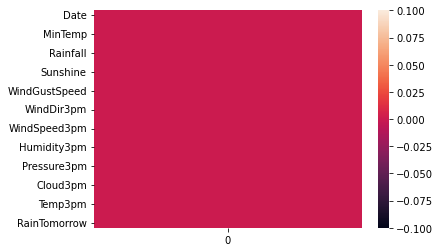

In [79]:
# Using Heat map to check for null values
sns.heatmap(rain_dt.isnull().sum().to_frame())

# Univarite Analysis

In [80]:
new_rain_dt=rain_dt.copy()

In [81]:
# Converting Date into Year, Month, day 

new_rain_dt[['Year','Month','Day']] = new_rain_dt['Date'].str.split("-",expand = True)
# splitting the date into year,month day using python split function

In [82]:
new_rain_dt[['Year','Month','Day']]=new_rain_dt[['Year','Month','Day']].astype(int)

In [83]:
# droping one column of year to avoid redundant data
new_rain_dt.drop(['Date'],axis=1, inplace=True)
new_rain_dt.head(5)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
6049    Cobar     17.9     35.2       0.0         12.0      12.3         SSW   
6050    Cobar     18.4     28.9       0.0         14.8      13.0           S   
6052    Cobar     19.4     37.6       0.0         10.8      10.6         NNE   
6053    Cobar     21.9     38.4       0.0         11.4      12.2         WNW   
6054    Cobar     24.2     41.0       0.0         11.2       8.4         WNW   

      WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  \
6049           48.0        ENE         SW  ...       1004.4       2.0   
6050           37.0        SSE        SSE  ...       1012.1       1.0   
6052           46.0        NNE        NNW  ...       1009.2       1.0   
6053           31.0        WNW        WSW  ...       1009.1       1.0   
6054           35.0         NW        WNW  ...       1007.4       1.0   

      Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
6049       5.0     26.6     33.4         No            No  2009      1    1  
6050       1.0     20.3     27.0         No            No  2009      1    2  
6052       6.0     28.7     34.9         No            No  2009      1    4  
6053       5.0     29.1     35.6         No            No  2009      1    5  
6054       6.0     33.6     37.6         No            No  2009      1    6  

[5 rows x 25 columns]

In [84]:
# changeing into 0 and 1 of raintoday and raintomorrow
new_rain_dt['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
new_rain_dt['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [85]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
obj_var=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'] 
le = LabelEncoder()
for i in obj_var:
    new_rain_dt[i] = le.fit_transform(new_rain_dt[i])
new_rain_dt.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6049         4     17.9     35.2       0.0         12.0      12.3   
6050         4     18.4     28.9       0.0         14.8      13.0   
6052         4     19.4     37.6       0.0         10.8      10.6   
6053         4     21.9     38.4       0.0         11.4      12.2   
6054         4     24.2     41.0       0.0         11.2       8.4   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  \
6049           11           48.0           1          12  ...       1004.4   
6050            8           37.0          10          10  ...       1012.1   
6052            5           46.0           5           6  ...       1009.2   
6053           14           31.0          14          15  ...       1009.1   
6054           14           35.0           7          14  ...       1007.4   

      Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  \
6049       2.0       5.0     26.6     33.4          0             0  2009   
6050       1.0       1.0     20.3     27.0          0             0  2009   
6052       1.0       6.0     28.7     34.9          0             0  2009   
6053       1.0       5.0     29.1     35.6          0             0  2009   
6054       1.0       6.0     33.6     37.6          0             0  2009   

      Month  Day  
6049      1    1  
6050      1    2  
6052      1    4  
6053      1    5  
6054      1    6  

[5 rows x 25 columns]

In [86]:
 new_rain_dt.describe()

Location       MinTemp       MaxTemp      Rainfall   Evaporation  \
count  56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean      12.628837     13.464770     24.219206      2.130397      5.503135   
std        7.301231      6.416689      6.970676      7.014822      3.696282   
min        0.000000     -6.700000      4.100000      0.000000      0.000000   
25%        7.000000      8.600000     18.700000      0.000000      2.800000   
50%       13.000000     13.200000     23.900000      0.000000      5.000000   
75%       19.000000     18.400000     29.700000      0.600000      7.400000   
max       25.000000     31.400000     48.100000    206.200000     81.200000   

           Sunshine   WindGustDir  WindGustSpeed    WindDir9am    WindDir3pm  \
count  56420.000000  56420.000000   56420.000000  56420.000000  56420.000000   
mean       7.735626      7.485537      40.877366      7.122935      7.574424   
std        3.758153      4.792305      13.335232      4.660823      4.711700   
min        0.000000      0.000000       9.000000      0.000000      0.000000   
25%        5.000000      3.000000      31.000000      3.000000      3.000000   
50%        8.600000      8.000000      39.000000      7.000000      8.000000   
75%       10.700000     12.000000      48.000000     11.000000     12.000000   
max       14.500000     15.000000     124.000000     15.000000     15.000000   

       ...   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  ...  56420.000000  56420.000000  56420.000000  56420.000000   
mean   ...   1014.795580      4.241705      4.326515     18.204961   
std    ...      6.870892      2.797162      2.647251      6.567991   
min    ...    977.100000      0.000000      0.000000     -0.700000   
25%    ...   1010.100000      1.000000      2.000000     13.100000   
50%    ...   1014.700000      5.000000      5.000000     17.800000   
75%    ...   1019.400000      7.000000      7.000000     23.300000   
max    ...   1038.900000      8.000000      9.000000     39.400000   

            Temp3pm     RainToday  RainTomorrow          Year         Month  \
count  56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean      22.710333      0.220879      0.220259   2012.221074      6.425009   
std        6.836543      0.414843      0.414425      2.450978      3.451383   
min        3.700000      0.000000      0.000000   2007.000000      1.000000   
25%       17.400000      0.000000      0.000000   2010.000000      3.000000   
50%       22.400000      0.000000      0.000000   2012.000000      6.000000   
75%       27.900000      0.000000      0.000000   2014.000000      9.000000   
max       46.100000      1.000000      1.000000   2017.000000     12.000000   

                Day  
count  56420.000000  
mean      15.723910  
std        8.782527  
min        1.000000  
25%        8.000000  
50%       16.000000  
75%       23.000000  
max       31.000000  

[8 rows x 25 columns]

# Univarite Analysis

In [89]:
numerical_feature = [feature for feature in new_rain_dt.columns if new_rain_dt[feature].dtypes != 'O']

In [91]:
discrete_feature=[feature for feature in numerical_feature if len( new_rain_dt[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]

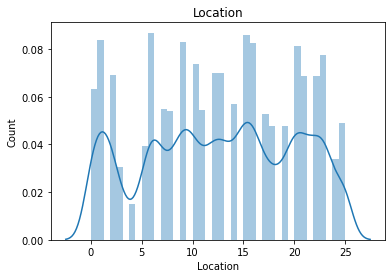

<Figure size 1080x1080 with 0 Axes>

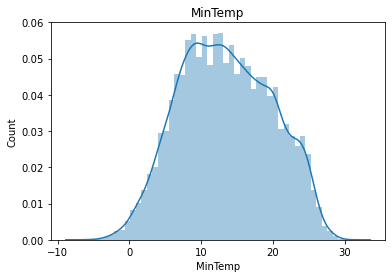

<Figure size 1080x1080 with 0 Axes>

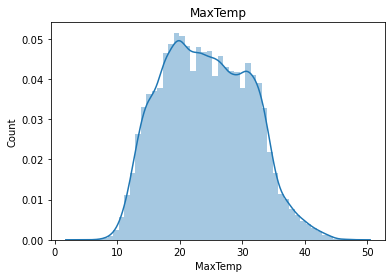

<Figure size 1080x1080 with 0 Axes>

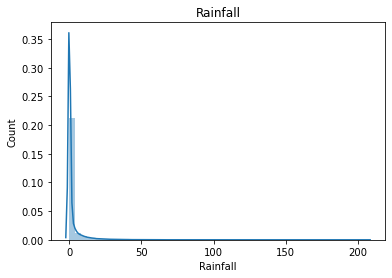

<Figure size 1080x1080 with 0 Axes>

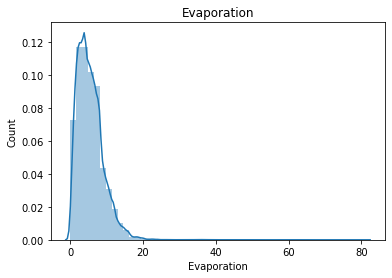

<Figure size 1080x1080 with 0 Axes>

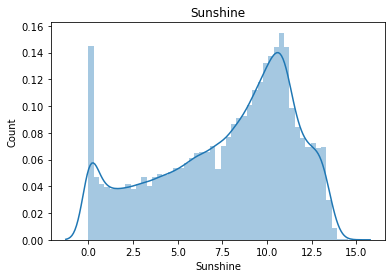

<Figure size 1080x1080 with 0 Axes>

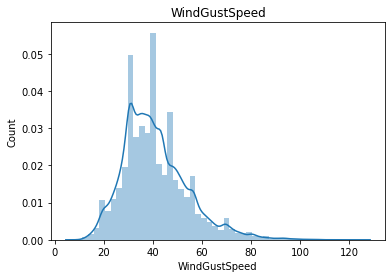

<Figure size 1080x1080 with 0 Axes>

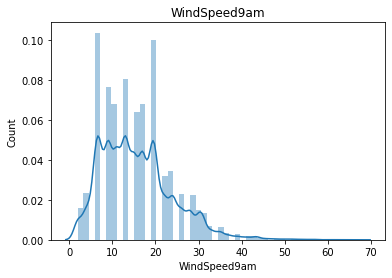

<Figure size 1080x1080 with 0 Axes>

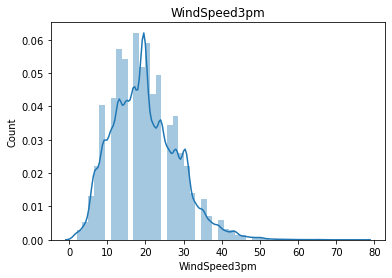

<Figure size 1080x1080 with 0 Axes>

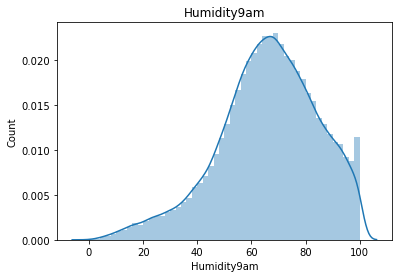

<Figure size 1080x1080 with 0 Axes>

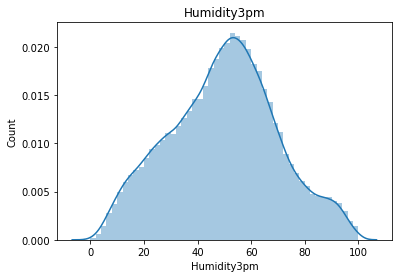

<Figure size 1080x1080 with 0 Axes>

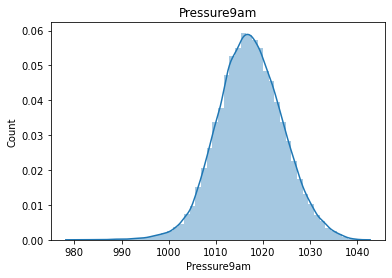

<Figure size 1080x1080 with 0 Axes>

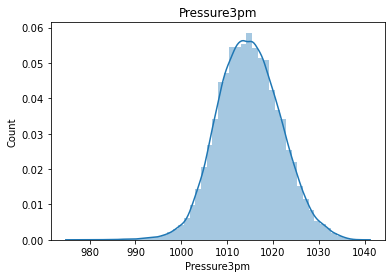

<Figure size 1080x1080 with 0 Axes>

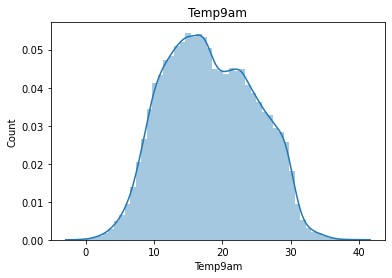

<Figure size 1080x1080 with 0 Axes>

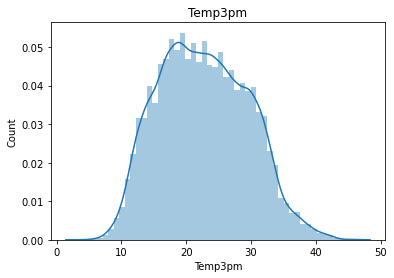

<Figure size 1080x1080 with 0 Axes>

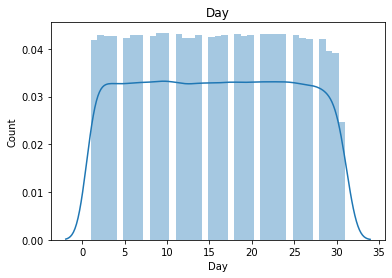

<Figure size 1080x1080 with 0 Axes>

In [93]:
# visualize 
for feature in continuous_feature:
    #data=df.copy()
    data=new_rain_dt
    sns.distplot(new_rain_dt[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

# Multivarite Analysis

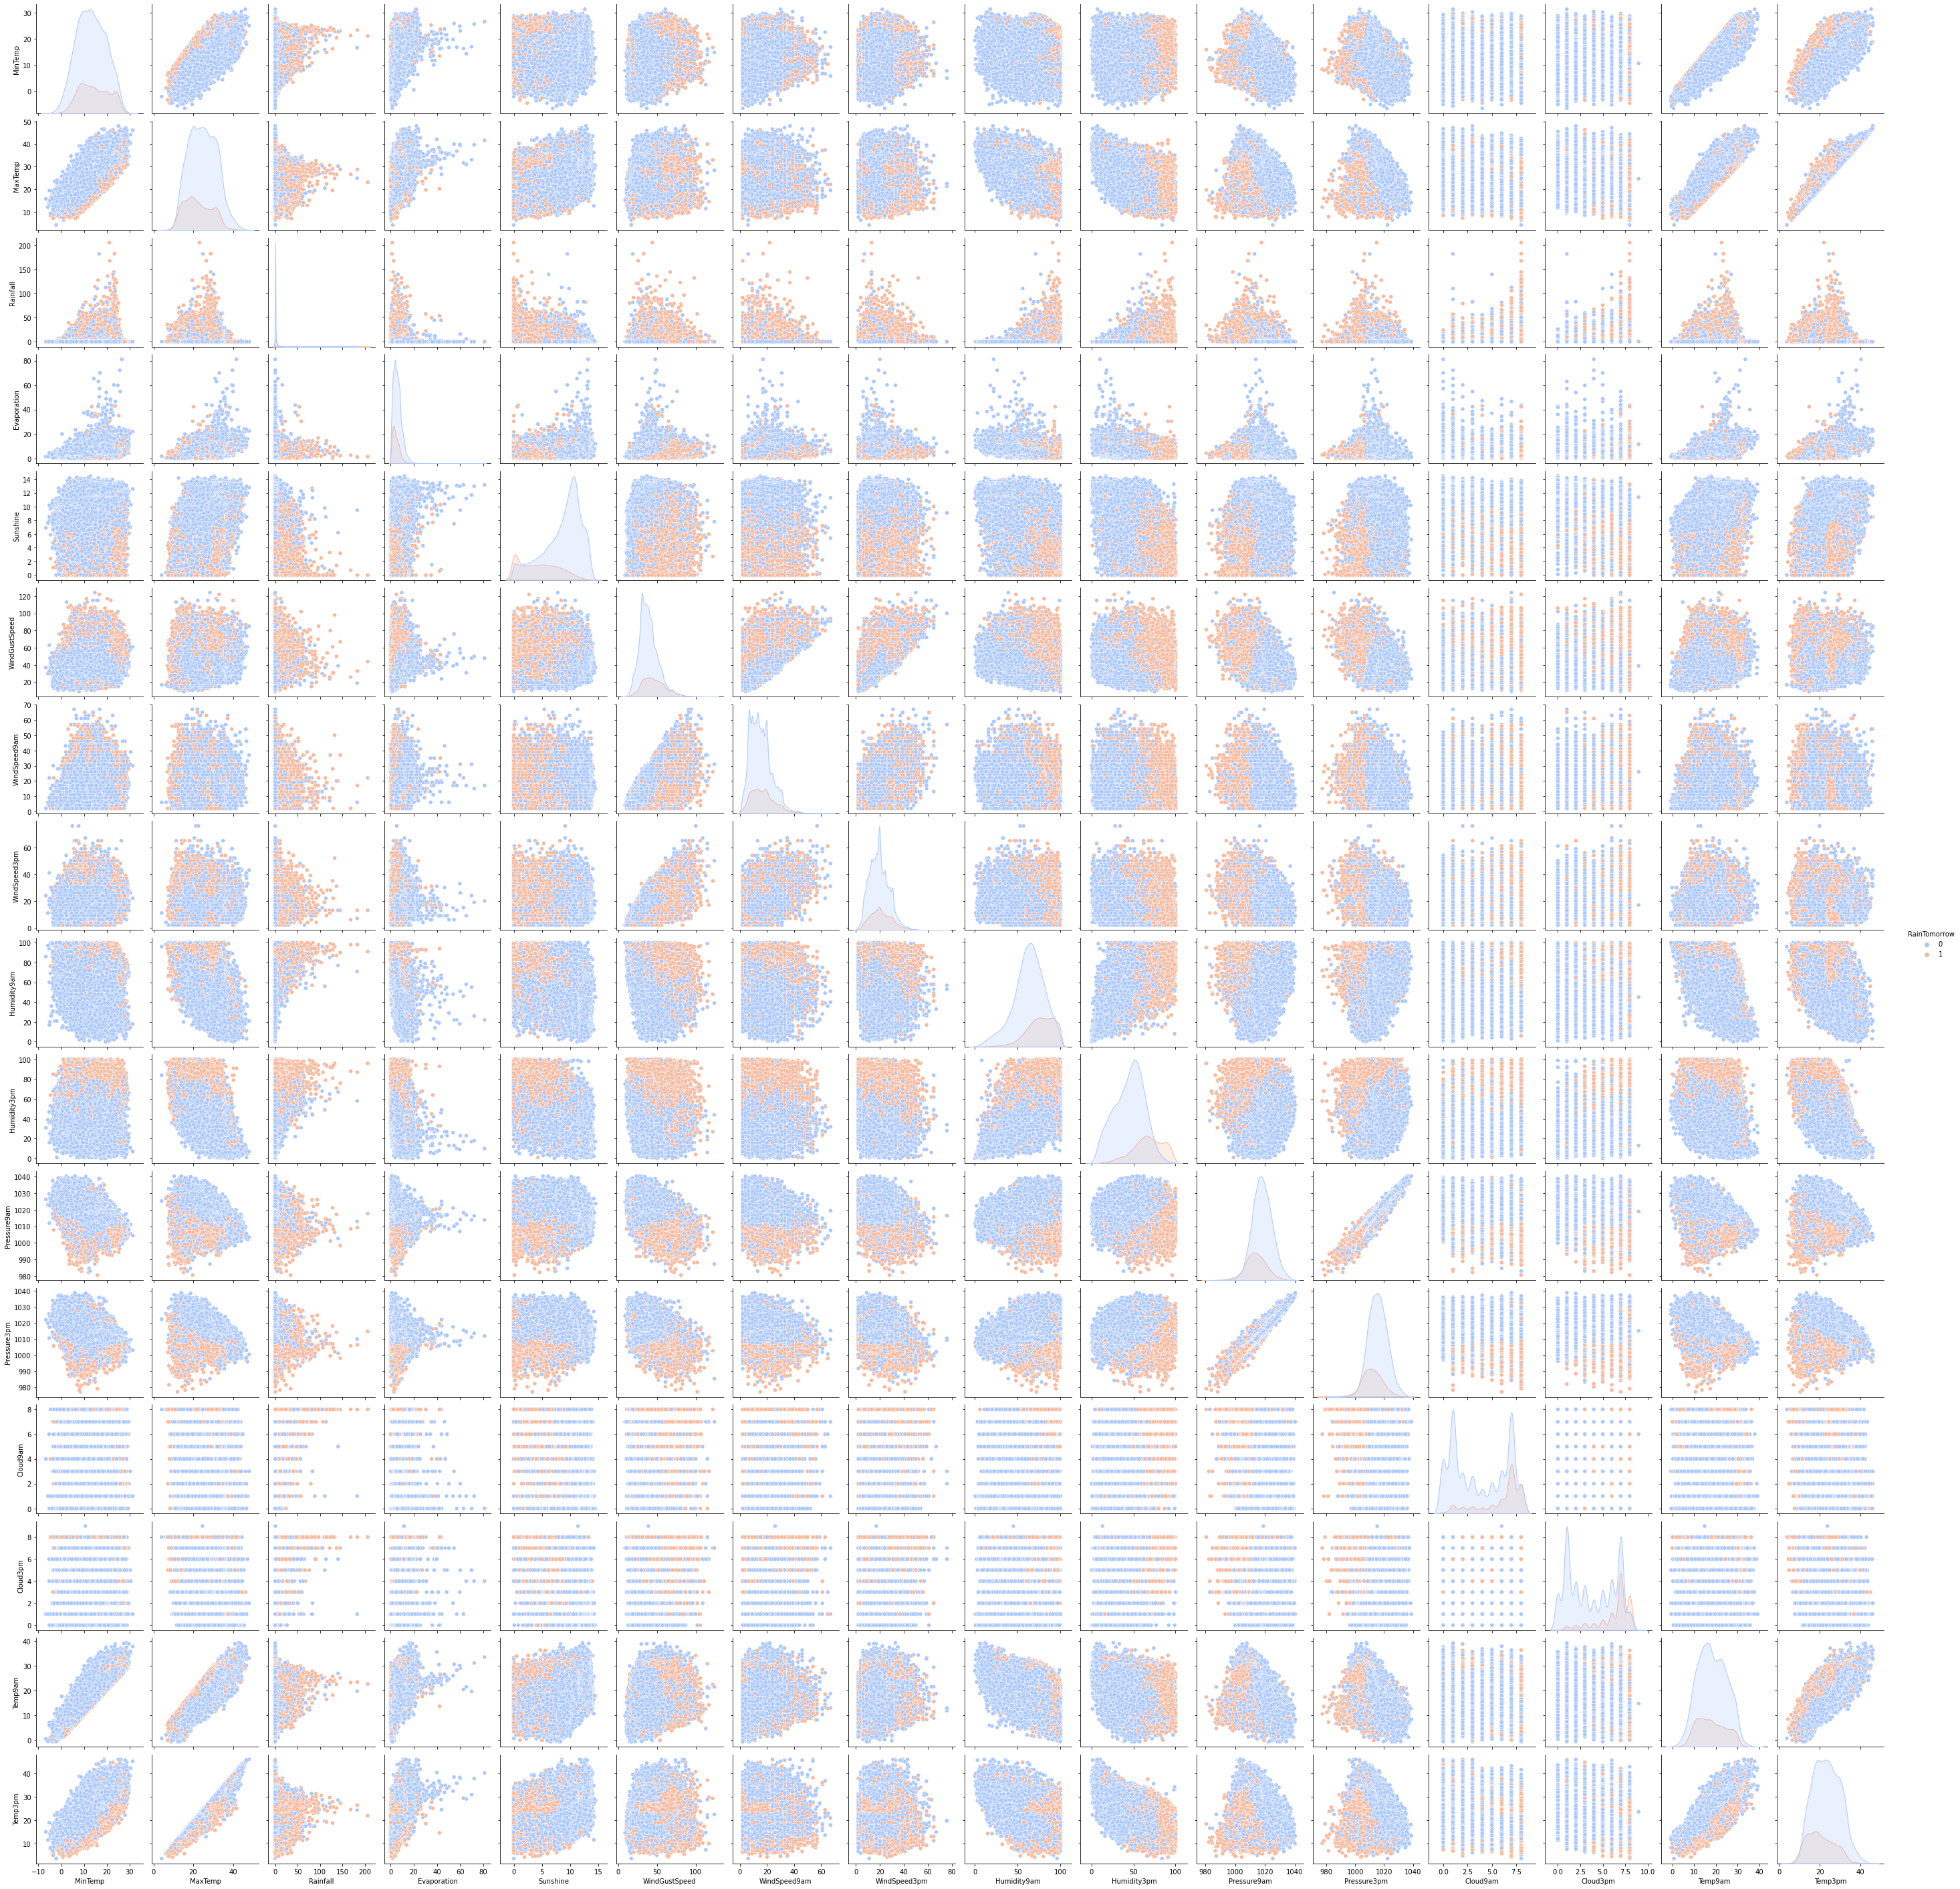

In [104]:
#Pairplot of all numerical variables
sns.pairplot(new_rain_dt,vars=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'],hue='RainTomorrow',palette="coolwarm")
plt.show()
#plt.show()

# Feature Selection/Extraction- to identify the most relevant features

<AxesSubplot:>

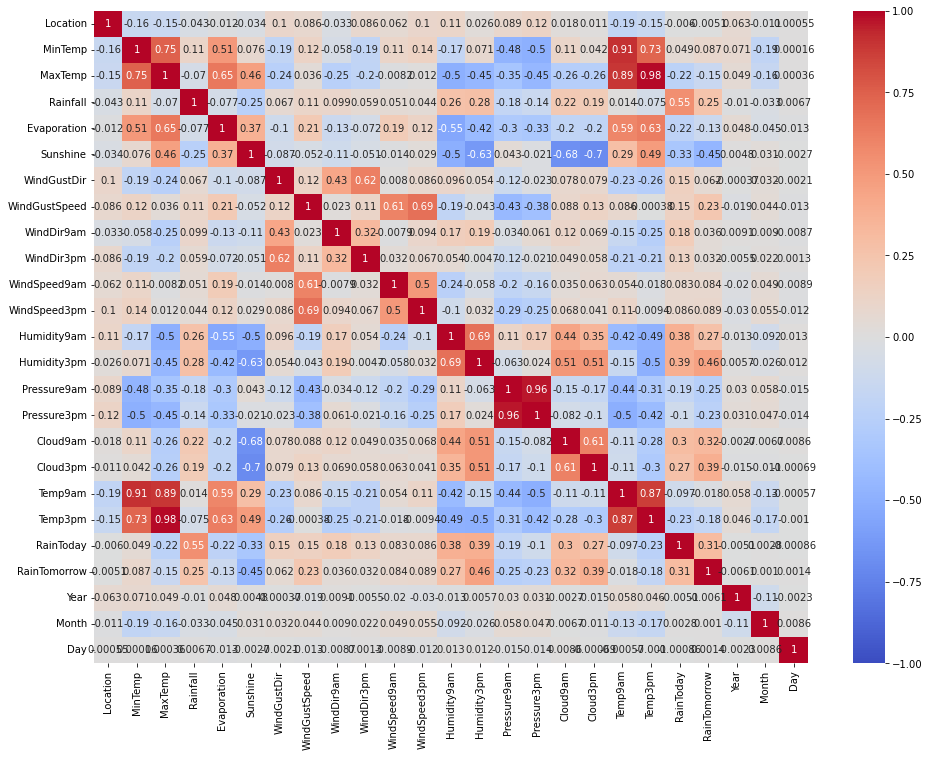

In [105]:
# Having a look at the correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(new_rain_dt.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=new_rain_dt.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

In [106]:

# Checking for Outliers
# Checking for skewness of the data to determine outliers
new_rain_dt.skew()

Location        -0.088320
MinTemp          0.052469
MaxTemp          0.185014
Rainfall         7.502521
Evaporation      2.232267
Sunshine        -0.551711
WindGustDir     -0.057931
WindGustSpeed    0.960215
WindDir9am       0.071683
WindDir3pm      -0.058736
WindSpeed9am     0.933070
WindSpeed3pm     0.596814
Humidity9am     -0.489376
Humidity3pm      0.005988
Pressure9am     -0.064353
Pressure3pm     -0.000580
Cloud9am        -0.160677
Cloud3pm        -0.191081
Temp9am          0.111134
Temp3pm          0.195421
RainToday        1.345718
RainTomorrow     1.350070
Year             0.151370
Month            0.006932
Day              0.007724
dtype: float64

In [107]:
from sklearn.preprocessing import power_transform # using power Transformation method to remove outliers from Capital_gain and Capital loss
new_rain_dt[['Rainfall']]=power_transform(new_rain_dt[['Rainfall']],method='yeo-johnson')

In [108]:
# Checking for skewness of the data after transformatio
new_rain_dt.skew()

Location        -0.088320
MinTemp          0.052469
MaxTemp          0.185014
Rainfall         1.010292
Evaporation      2.232267
Sunshine        -0.551711
WindGustDir     -0.057931
WindGustSpeed    0.960215
WindDir9am       0.071683
WindDir3pm      -0.058736
WindSpeed9am     0.933070
WindSpeed3pm     0.596814
Humidity9am     -0.489376
Humidity3pm      0.005988
Pressure9am     -0.064353
Pressure3pm     -0.000580
Cloud9am        -0.160677
Cloud3pm        -0.191081
Temp9am          0.111134
Temp3pm          0.195421
RainToday        1.345718
RainTomorrow     1.350070
Year             0.151370
Month            0.006932
Day              0.007724
dtype: float64

# Data Preprocessing for Classification problem fort Task 1


In [109]:
# Separating feature data and Label data
X = new_rain_dt.drop(['RainTomorrow'],axis=1)
y= new_rain_dt['RainTomorrow']

In [110]:
# Standardizing the dataset for X
from sklearn.preprocessing import StandardScaler
stdscalar= StandardScaler()
X_Scalar= stdscalar.fit_transform(X)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_Scalar, y, test_size = 0.25,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((42315, 24), (14105, 24), (42315,), (14105,))

# Build/Test multiple models

In [112]:
#Using Logistic Regression to  train a logistic regression model on the training set
lreg = LogisticRegression()
lreg.fit(X_train, y_train)
# Predicting the data model
lreg_pred = lreg.predict(X_test) # Predicting the model
lreg_pred.shape

(14105,)

In [113]:
#Accuracy and various Metrics for the model
LR_testing=round(lreg.score(X_train, y_train)*100,2)
LR_mae=mean_absolute_error(lreg_pred,y_test)
LR_mse=mean_squared_error(lreg_pred,y_test)
LR_rmse=np.sqrt(mean_squared_error(lreg_pred,y_test))
LR_r2=r2_score(y_test,lreg_pred)*100
print('Mean absolute error  =>',LR_mae)
print('Mean squared error  =>',LR_mse)
print('Root Mean squared error  =>',LR_rmse)
print('R2 Score  =>',LR_r2)
print("Accuracy Score of Testing Data is =>",LR_testing)

Mean absolute error  => 0.14377880184331798
Mean squared error  => 0.14377880184331798
Root Mean squared error  => 0.37918175304636953
R2 Score  => 16.65313242398372
Accuracy Score of Testing Data is => 85.44


In [116]:
# Create instances of all other classifier- Using other models
rfc=RandomForestClassifier()
et =ExtraTreesClassifier() 
bmc = BaggingClassifier() 
abc = AdaBoostClassifier()
gbc=GradientBoostingClassifier()
rft=RandomForestClassifier()
#knn= KNeighborsClassifier()
svc=SVC(random_state=42)
dt=DecisionTreeClassifier(random_state=42)



 Error of  RandomForestClassifier() :
Mean absolute error : 0.13732718894009216
Mean squared error : 0.13732718894009216
Root Mean Squared Error: 0.3705768327082687


 R2 Score : 0.2039305596906138
86.26728110599078




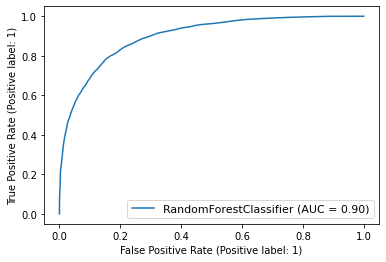



 Error of  ExtraTreesClassifier() :
Mean absolute error : 0.13704360155973058
Mean squared error : 0.13704360155973058
Root Mean Squared Error: 0.3701940052995599


 R2 Score : 0.20557448212801055
86.29563984402694




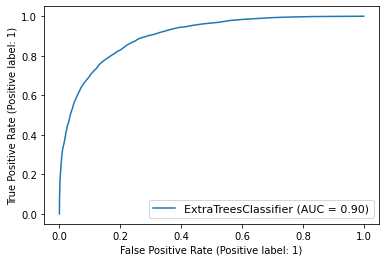



 Error of  BaggingClassifier() :
Mean absolute error : 0.15193193902871321
Mean squared error : 0.15193193902871321
Root Mean Squared Error: 0.3897844776651749


 R2 Score : 0.11926855416468007
84.80680609712867




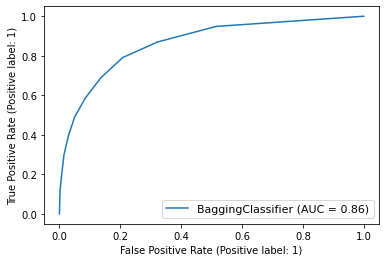



 Error of  AdaBoostClassifier() :
Mean absolute error : 0.14874158099964552
Mean squared error : 0.14874158099964552
Root Mean Squared Error: 0.38567030090434173


 R2 Score : 0.13776268158539373
85.12584190003545




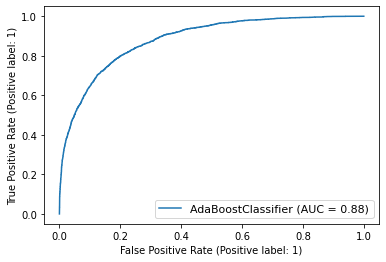



 Error of  GradientBoostingClassifier() :
Mean absolute error : 0.14306983339241403
Mean squared error : 0.14306983339241403
Root Mean Squared Error: 0.3782457314926555


 R2 Score : 0.17064113033332917
85.69301666075859




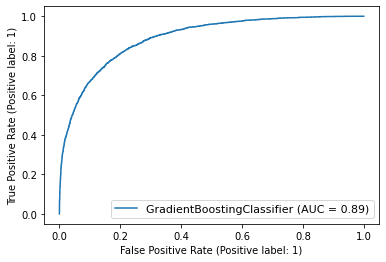



 Error of  RandomForestClassifier() :
Mean absolute error : 0.13626373626373625
Mean squared error : 0.13626373626373625
Root Mean Squared Error: 0.36913918278033864


 R2 Score : 0.2100952688308516
86.37362637362638




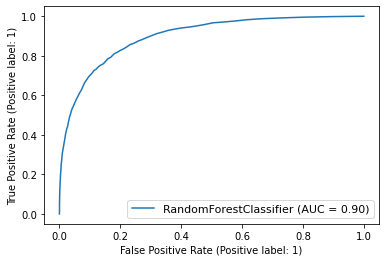



 Error of  SVC(random_state=42) :
Mean absolute error : 0.14065934065934066
Mean squared error : 0.14065934065934066
Root Mean Squared Error: 0.37504578475079636


 R2 Score : 0.18461447105120166
85.93406593406593




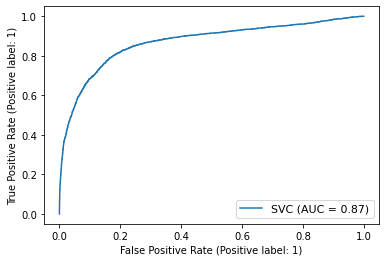



 Error of  DecisionTreeClassifier(random_state=42) :
Mean absolute error : 0.20397022332506204
Mean squared error : 0.20397022332506204
Root Mean Squared Error: 0.45163062708928636


 R2 Score : -0.1823912130976273
79.6029776674938




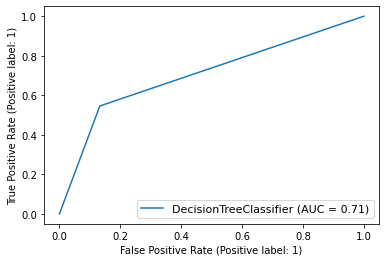

In [117]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
#Train the model using the training sets y_pred=clf.predict(X_test), prediction on test set
for clf in (rfc, et, bmc, abc,gbc,rft,svc,dt):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('\n')                                        
    print(' Error of ', clf, ':' )
    print('Mean absolute error :', mean_absolute_error(y_test, y_pred))
    print('Mean squared error :', mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('\n')

    print(' R2 Score :',r2_score(y_test, y_pred))
    #print(r2_score(y_test,y_pred)*100) 
    print(accuracy_score(y_test, y_pred)*100)
    print('\n')
    display = RocCurveDisplay.from_estimator(clf,X_test,y_test)   
    plt.legend(prop={'size':11}, loc='lower right')
    plt.show()
    #print('=============================================================================================================='))

# Cross Validation for the Models

In [118]:

ExtraTreesClassifier() 
BaggingClassifier() 
AdaBoostClassifier()
GradientBoostingClassifier()
RandomForestClassifier()
#KNeighborsClassifier()
SVC(random_state=42)
DecisionTreeClassifier(random_state=42)

DecisionTreeClassifier(random_state=42)

In [119]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, X_Scalar,y):
    rmse =(cross_val_score(model, X_Scalar,y, cv=6))
    return(rmse)



models = [RandomForestClassifier(),
         BaggingClassifier(),
         AdaBoostClassifier(),
         AdaBoostClassifier(),
         GradientBoostingClassifier(),
         #KNeighborsClassifier(),
         SVC(random_state=42),
         DecisionTreeClassifier(random_state=42), 
         ]
          
          
names = [rfc, et, bmc, abc,gbc,rft,svc,dt]
          
for model,name in zip(models,names):
          score = rmse_cv(model,X,y)
          print("{}  : {:.4f}, {:4f}".format(name,score.mean()*100,score.std()*100))

RandomForestClassifier()  : 84.8263, 1.889186
ExtraTreesClassifier()  : 83.2400, 2.179574
BaggingClassifier()  : 84.1404, 1.327626
AdaBoostClassifier()  : 84.1404, 1.327626
GradientBoostingClassifier()  : 83.6193, 1.900498
RandomForestClassifier()  : nan,  nan
KNeighborsClassifier()  : 79.2325, 0.566037
SVC(random_state=42)  : 76.7387, 3.966703


# Hyper Parameter Tuning : GridSearchCV for Task 1

In [122]:
param_grid ={'criterion' : ['gini', 'entropy'],
              'min_samples_split':[3,5,8],
              'max_depth' : [20,30,40],
              'n_estimators' : [100, 150, 200]
             }

In [123]:
grid_search = GridSearchCV(RandomForestClassifier(),param_grid)
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]})

In [124]:
print(grid_search.best_estimator_)
print('Best score:', grid_search.best_score_) #grid.cv_scores_
print('Best params:', grid_search.best_params_)

RandomForestClassifier(max_depth=40, min_samples_split=3, n_estimators=150)
Best score: 0.8636653668911733
Best params: {'criterion': 'gini', 'max_depth': 40, 'min_samples_split': 3, 'n_estimators': 150}


In [125]:
y_pred_grid=grid_search.best_estimator_.predict(X_test) # With best parameter
y_pred_grid

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [126]:
print('MSE:',mean_squared_error(y_pred_grid,y_test))
print('MAE:',mean_absolute_error(y_pred_grid,y_test))
print('Accuracy Score:',accuracy_score(y_pred_grid,y_test)*100)

MSE: 0.1372562920950018
MAE: 0.1372562920950018
Accuracy Score: 86.27437079049982


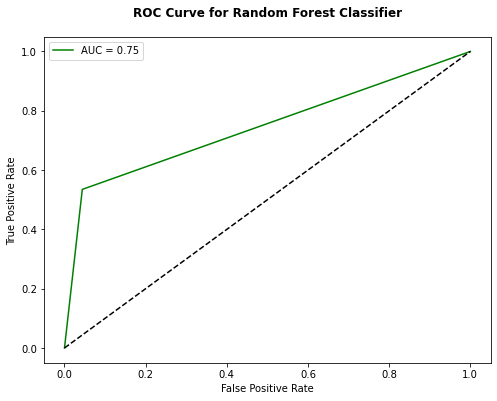

In [127]:
#ROC Curve and Area Under the Curve (AUC) for Decision Tree
y_pred_proba =grid_search.best_estimator_.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_grid)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_grid)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest Classifier",pad=20,fontweight="black")
plt.legend()
plt.show()

# Saving the best Model for Task 1

In [129]:
joblib.dump(grid_search.best_estimator_,'Raintomoorow Final Status.obj')

['Raintomoorow Final Status.obj']

Y Test  Pred
47050        1     0
139158       0     0
23488        0     0
32117        0     0
122837       0     0
...        ...   ...
70692        0     0
103950       0     0
33228        0     0
139222       0     0
123736       0     0

[14105 rows x 2 columns]

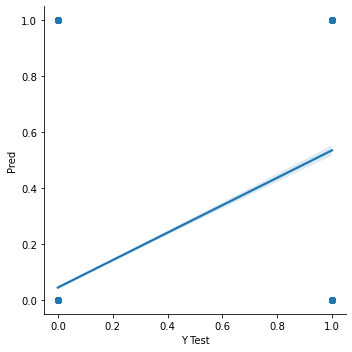

In [130]:
# Comparing the Actual price and predicted price
cmp_data = pd.DataFrame({'Y Test':y_test , 'Pred':y_pred_grid},columns=['Y Test','Pred'])
#cmp_data = pd.DataFrame({'Y Test':np.array(y_test) , 'Pred':np.array(y_pred_grid)},index= range(len(y_test)))
sns.lmplot(x='Y Test',y='Pred',data=cmp_data,palette='rainbow')
cmp_data